<a href="https://colab.research.google.com/github/lerekoqholosha/coding-challenge/blob/master/Starter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="intro"></a>
##  Introduction  

### Project Description

Machine learning is a powerful branch of Artificial Intelligence, dating as far back as 1952,  developed to teach computer systems how to make decisions emanated from preexisting data. Mathematical algorithms are applied to training data which allows a machine to identify patterns and make predictions for unseen datasets.

Regression is a popular supervised statistical learning method that aims to predict the value of a dependent variable (y) based on an independent variable (x). The relationship between the variables can be linear or nonlinear.

The Zindi challenge, hosted by Sendy in partnership with insight2impact facility, is to build a regression model that will predict an accurate time of arrival for motobike deliveries from the pickup point to the destination of the package. An accurate arrival time will enhance customer communication and customer experience. In addition, the solution will help businesses reduce the cost of trade through better management of resources and planning.  

### Problem Statement
Build a regression model that will predict an accurate time of arrival for motobike deliveries from the pickup point to the destination of the package.

### Datasets and Variables  

The dataset provided by Sendy includes order details and rider metrics based on orders made on the Sendy platform. The challenge is to predict the estimated time of arrival for orders, from pick-up to drop-off. The training dataset is a subset of over 20,000 orders and only includes direct orders (i.e. Sendy “express” orders) with bikes in Nairobi. 

**train_data:** The dataset that will be used to train our model  
**test_data:** The dataset to which we will apply our model  
**riders:** Contains unique rider IDs, number of orders, age, rating and number of ratings

**Order details**  
* Order No: Unique number identifying the order  
* User Id: Unique number identifying the customer on a platform  
* Vehicle Type: For this competition limited to bikes, however in practice, Sendy service extends to trucks and vans  
* Platform Type: Platform used to place the order (there are 4 types)  
* Personal or Business: Customer type  

**Placement times**  
* Placement: Day of Month (i.e 1-31)  
* Placement: Weekday (Monday = 1)  
* Placement: Time - Time of day the order was placed  

**Confirmation times**  
* Confirmation: Day of Month (i.e 1-31)  
* Confirmation: Weekday (Monday = 1)  
* Confirmation: Time (Time of day the order was confirmed by a rider)  

**Arrival at Pickup times**  
* Arrival at Pickup: Day of Month (i.e 1-31)  
* Arrival at Pickup: Weekday (Monday = 1)  
* Arrival at Pickup: Time (Time of day the rider arrived at the location to pick up the order - as marked by the rider through the Sendy application)  

**Pickup times**  
* Pickup: Day of Month (i.e 1-31)  
* Pickup: Weekday (Monday = 1)  
* Pickup: Time (Time of day the rider picked up the order - as marked by the rider through the Sendy application)  

**Arrival at Destination times** (not in Test set)  
* Arrival at Destination: Day of Month (i.e 1-31)  
* Arrival at Destination: Weekday (Monday = 1)  
* Arrival at Destination: Time (Time of day the rider arrived at the destination to deliver the order - as marked by the rider through the Sendy application)  
* Distance covered (KM): The distance from Pickup to Destination  
* Temperature: Temperature at the time of order placement in Degrees Celsius (measured every three hours)  
* Precipitation in Millimeters: Precipitation at the time of order placement (measured every three hours)  
* Pickup Latitude and Longitude: Latitude and longitude of pick up location  
* Destination Latitude and Longitude: Latitude and longitude of delivery location  
* Rider ID: ID of the Rider who accepted the order  
* Time from Pickup to Arrival: Time in seconds between ‘Pickup’ and ‘Arrival at Destination’ **(Target variable)**    

**Rider metrics**  
* Rider ID: Unique number identifying the rider (same as in order details)  
* No of Orders: Number of Orders the rider has delivered  
* Age: Number of days since the rider delivered the first order  
* Average Rating: Average rating of the rider  
* No of Ratings: Number of ratings the rider has received. Rating an order is optional for the customer

In [ ]:
# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

# Prerequisites
import sys
!{sys.executable} -m pip install scikit-learn folium 
# Load Dependencies
import time
import folium
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium.plugins as plugins

from math import sqrt
from sklearn import metrics
from folium.plugins import HeatMap
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Display
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")

In [ ]:
#only required if on google colab: 
from google.colab import files
uploaded = files.upload()

Saving SampleSubmission.csv to SampleSubmission.csv


In [ ]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')
riders = pd.read_csv('Riders.csv')

In [ ]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [ ]:
train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [ ]:
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


### Merge Datasets

In [ ]:
# List columns not present in the test dataset
[name for name in train_df.columns if name not in test_df.columns]

['Arrival at Destination - Day of Month',
 'Arrival at Destination - Weekday (Mo = 1)',
 'Arrival at Destination - Time',
 'Time from Pickup to Arrival']

Our target variable for this project is 'Time from Pickup to Arrival' (in seconds), therefore it is not included in our testing set. All other information about the day/time of arrival is also not included.

In [ ]:
# Merge datasets
train_data = pd.merge(train_df,riders,on='Rider Id',how='left')
test_data = pd.merge(test_df,riders,on='Rider Id',how='left')

# Rename columns
train_data.columns = [column.replace("Of","of") for column in train_data.columns]
train_data.columns = [column.replace("_"," ") for column in train_data.columns]
train_data.columns = [column.replace("(Mo = 1)"," ") for column in train_data.columns]
train_data = train_data.rename(columns=lambda x: x.strip())
test_data.columns = [column.replace("Of","of") for column in test_data.columns]
test_data.columns = [column.replace("_"," ") for column in test_data.columns]
test_data.columns = [column.replace("(Mo = 1)"," ") for column in test_data.columns]
test_data = test_data.rename(columns=lambda x: x.strip())

In [ ]:
train_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday,Placement - Time,Confirmation - Day of Month,Confirmation - Weekday,Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday,Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday,Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No of Orders,Age,Average Rating,No of Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


In [ ]:
test_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday,Placement - Time,Confirmation - Day of Month,Confirmation - Weekday,Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday,Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday,Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No of Orders,Age,Average Rating,No of Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010


<a id="EDA"></a>
## Exploratory Data Analysis

What data types are we dealing with?

In [ ]:
train_data.dtypes

Order No                                  object
User Id                                   object
Vehicle Type                              object
Platform Type                              int64
Personal or Business                      object
Placement - Day of Month                   int64
Placement - Weekday                        int64
Placement - Time                          object
Confirmation - Day of Month                int64
Confirmation - Weekday                     int64
Confirmation - Time                       object
Arrival at Pickup - Day of Month           int64
Arrival at Pickup - Weekday                int64
Arrival at Pickup - Time                  object
Pickup - Day of Month                      int64
Pickup - Weekday                           int64
Pickup - Time                             object
Arrival at Destination - Day of Month      int64
Arrival at Destination - Weekday           int64
Arrival at Destination - Time             object
Distance (KM)       

### Missing Data

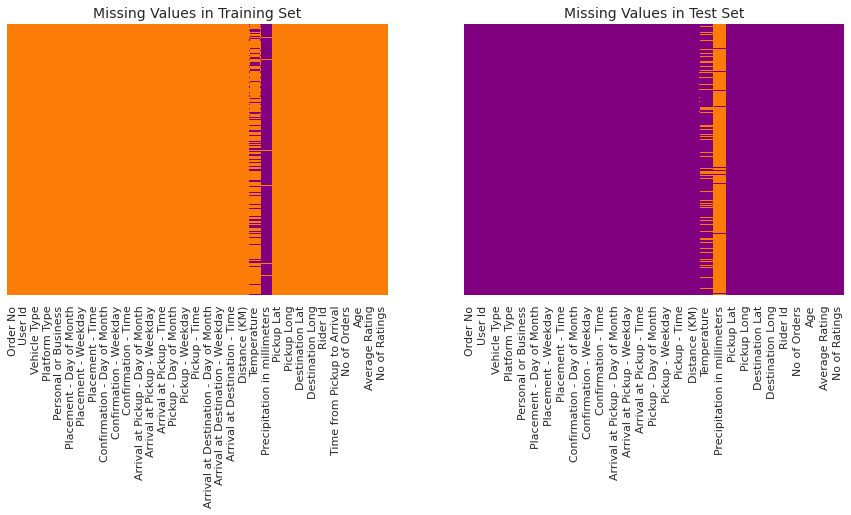

,% missing training set,% missing testing set
Precipitation in millimeters,97.40,97.18
Temperature,20.59,20.33


In [ ]:
# Check columns for missing values
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))

#Training set
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap=['#fb7d07','purple'],ax=axis[0])
axis[0].set_title('Missing Values in Training Set',fontsize=14)
#Testing set
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap=['purple','#fb7d07'],ax=axis[1])
axis[1].set_title('Missing Values in Test Set',fontsize=14)

plt.show()

# Calculate percentage missing values
train = round((train_data.isnull().sum()/train_data.isnull().count())*100,2)
test = round((test_data.isnull().sum()/test_data.isnull().count())*100,2)
d = {'% missing training set': train, '% missing testing set': test}
pd.DataFrame(data=d).sort_values(by='% missing training set',ascending=False).head(2)

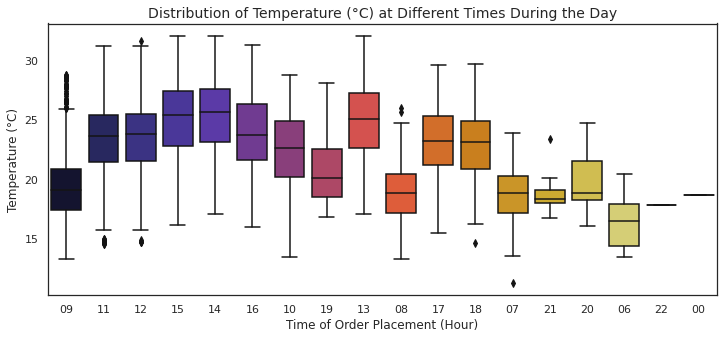

In [ ]:
# Create 24h time bins for when orders were placed
train_data['Placement - Time(bins)'] = pd.to_datetime(pd.to_datetime(train_data['Placement - Time']).dt.strftime('%H:%M:%S')).dt.strftime('%H')
test_data['Placement - Time(bins)'] = pd.to_datetime(pd.to_datetime(test_data['Placement - Time']).dt.strftime('%H:%M:%S')).dt.strftime('%H')

fig,axis = plt.subplots(figsize=(12,5))
sns.boxplot(x='Placement - Time(bins)',y='Temperature',data=train_data,palette='CMRmap')
plt.title('Distribution of Temperature (°C) at Different Times During the Day',fontsize=14)
plt.xlabel('Time of Order Placement (Hour)')
plt.ylabel('Temperature (°C)')
plt.show()


Exploring the target variable:

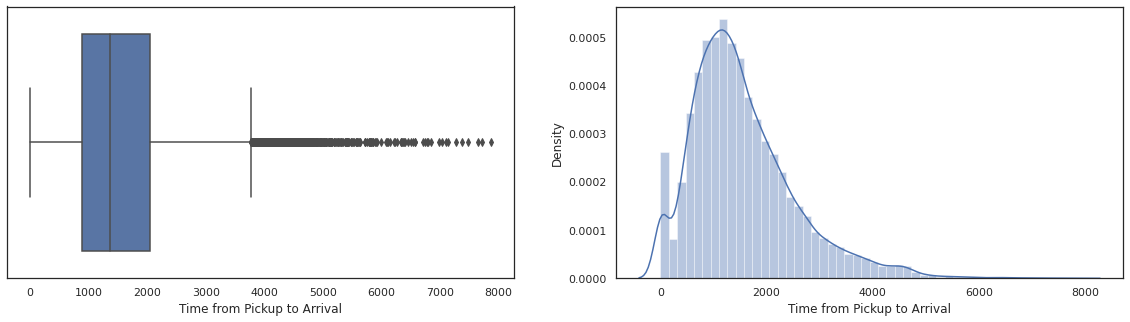

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(train_data["Time from Pickup to Arrival"], ax=ax[0])
sns.distplot(train_data["Time from Pickup to Arrival"], ax=ax[1])

### Summary statistics

In [ ]:
train_data.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday,Confirmation - Day of Month,Confirmation - Weekday,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday,Pickup - Day of Month,Pickup - Weekday,Arrival at Destination - Day of Month,Arrival at Destination - Weekday,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No of Orders,Age,Average Rating,No of Ratings
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947,1692.423706,984.742842,13.882520,341.067119
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788,1574.308302,646.652835,0.916071,402.867746
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000,2.000000,96.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000,557.000000,495.000000,13.600000,61.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000,1212.000000,872.000000,14.000000,161.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000,2311.000000,1236.000000,14.300000,495.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,9756.000000,3764.000000,15.200000,2298.000000


In [ ]:
test_data.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday,Confirmation - Day of Month,Confirmation - Weekday,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday,Pickup - Day of Month,Pickup - Weekday,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No of Orders,Age,Average Rating,No of Ratings
count,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,5631.000000,199.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000
mean,2.752122,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,9.458970,23.246120,6.651759,-1.282043,36.811148,-1.282255,36.811326,1717.032258,998.400113,13.883178,342.815789
std,0.624000,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,5.575689,3.591161,14.085439,0.030044,0.037962,0.034236,0.043507,1628.842795,672.195000,0.846333,410.064334
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.200000,0.100000,-1.433512,36.653828,-1.422652,36.639195,3.000000,99.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.100000,-1.301201,36.784605,-1.300921,36.786546,534.000000,494.000000,13.600000,60.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.400000,2.900000,-1.281301,36.807219,-1.283219,36.807927,1209.000000,872.000000,14.000000,157.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.900000,4.950000,-1.257274,36.829716,-1.261256,36.828195,2311.000000,1239.000000,14.300000,491.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,47.000000,32.100000,99.100000,-1.148352,36.991046,-1.030225,37.018958,9756.000000,3764.000000,15.200000,2298.000000


Quick correlation of numeric data with target variable:

In [ ]:
numeric_columns = []
object_cat_columns = []
time_columns = []
for i, j in train_data.dtypes.items():
    if (j != object):
        if (i != "Time from Pickup to Arrival"):
            numeric_columns.append(i)
    elif i.endswith("time"):
        time_columns.append(i)
    else:
        object_cat_columns.append(i)
train_data[numeric_columns].head(3) 

,Platform Type,Placement - Day of Month,Placement - Weekday,Confirmation - Day of Month,Confirmation - Weekday,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday,Pickup - Day of Month,Pickup - Weekday,Arrival at Destination - Day of Month,Arrival at Destination - Weekday,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No of Orders,Age,Average Rating,No of Ratings
0,3,9,5,9,5,9,5,9,5,9,5,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,549
1,3,12,5,12,5,12,5,12,5,12,5,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,396,339,13.6,69
2,3,30,2,30,2,30,2,30,2,30,2,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,1023,242,12.5,114


In [ ]:
correlation_matrix = train_data[numeric_columns+['Time from Pickup to Arrival']].corr()
print(correlation_matrix['Time from Pickup to Arrival'].sort_values(ascending=False))

Time from Pickup to Arrival              1.000000
Distance (KM)                            0.580608
Destination Long                         0.070425
Pickup Long                              0.060285
Precipitation in millimeters             0.024756
Arrival at Destination - Weekday         0.009744
Pickup - Weekday                         0.009744
Confirmation - Weekday                   0.009744
Arrival at Pickup - Weekday              0.009744
Placement - Weekday                      0.009693
Temperature                              0.006465
No of Ratings                            0.005609
Platform Type                           -0.003827
Age                                     -0.007969
Arrival at Destination - Day of Month   -0.014701
Pickup - Day of Month                   -0.014701
Arrival at Pickup - Day of Month        -0.014701
Confirmation - Day of Month             -0.014701
Placement - Day of Month                -0.014710
No of Orders                            -0.041608


### Feature engineering 

**Encoding Date/Time Features:**  
Date and time features (such as day of month, day of week, and time of day) are cyclical features that need to be represented in a way where the circular information isn't lost (e.g. that the hour 23:00 and the hour 01:00 are the same distance from midnight). To do this, we can represent each feature as coordinates on a circle using **_sin_** and **_cos_** trigonometric functions.

More information can be found here:  
https://medium.com/ai%C2%B3-theory-practice-business/top-6-errors-novice-machine-learning-engineers-make-e82273d394db  
http://blog.davidkaleko.com/feature-engineering-cyclical-features.html  
https://www.kaggle.com/avanwyk/encoding-cyclical-features-for-deep-learning  
https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/  

In [ ]:
# Convert pickup day of month feature to cyclical format
train_data['Pickup - Day of Month (sin)'] = np.sin((train_data['Pickup - Day of Month'])*(2.*np.pi/31))
train_data['Pickup - Day of Month (cos)'] = np.cos((train_data['Pickup - Day of Month'])*(2.*np.pi/31))
test_data['Pickup - Day of Month (sin)'] = np.sin((test_data['Pickup - Day of Month'])*(2.*np.pi/31))
test_data['Pickup - Day of Month (cos)'] = np.cos((test_data['Pickup - Day of Month'])*(2.*np.pi/31))

# Convert pickup weekday feature to cyclical format
train_data['Pickup - Weekday (sin)'] = np.sin(train_data['Pickup - Weekday']*(2.*np.pi/7))
train_data['Pickup - Weekday (cos)'] = np.cos(train_data['Pickup - Weekday']*(2.*np.pi/7))
test_data['Pickup - Weekday (sin)'] = np.sin(test_data['Pickup - Weekday']*(2.*np.pi/7))
test_data['Pickup - Weekday (cos)'] = np.cos(test_data['Pickup - Weekday']*(2.*np.pi/7))

# Function to calculate time in seconds (from midnight)
def time_in_seconds(df,column):
    df[column] = pd.to_datetime(df[column])
    return (df[column] - pd.to_datetime(pd.to_datetime('today').date())).astype('timedelta64[s]')

# Convert pickup time feature to cyclical format
train_data['Pickup - Time'] = time_in_seconds(train_data,'Pickup - Time')
test_data['Pickup - Time'] = time_in_seconds(test_data,'Pickup - Time')
train_data['Pickup - Time (sin)'] = np.sin(train_data['Placement - Time(bins)'].astype('int64')*(2.*np.pi/24))
train_data['Pickup - Time (cos)'] = np.cos(train_data['Placement - Time(bins)'].astype('int64')*(2.*np.pi/24))
test_data['Pickup - Time (sin)'] = np.sin(test_data['Placement - Time(bins)'].astype('int64')*(2.*np.pi/24))
test_data['Pickup - Time (cos)'] = np.cos(test_data['Placement - Time(bins)'].astype('int64')*(2.*np.pi/24))

**Visualising cyclical features:** An intuitive way to visualise how the cyclical data is now represented, is to plot the two new transformed features in 2D, the same way as we would plot time on a 24-hour clock. The distance between two points corresponds to the difference in time as we expect from a 24-hour cycle.  

In [ ]:
# Cyclical features
fig,((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))

# Training set
# Day of month
train_data.plot.scatter('Pickup - Day of Month (sin)','Pickup - Day of Month (cos)',ax=ax1,color='purple').set_aspect('equal')
ax1.set_title('Day of Month (Training Set)',fontsize=14)
ax1.set_xlabel('Day of Month (sin)')
ax1.set_ylabel('Day of Month (cos)')
# Weekday
train_data.plot.scatter('Pickup - Weekday (sin)','Pickup - Weekday (cos)',ax=ax2,color='blue').set_aspect('equal')
ax2.set_title('Weekday (Training Set)',fontsize=14)
ax2.set_xlabel('Weekday (sin)')
ax2.set_ylabel('Weekday (cos)')
# Time
train_data.plot.scatter('Pickup - Time (sin)','Pickup - Time (cos)',ax=ax3,color='#fb7d07').set_aspect('equal')
ax3.set_title('Time (Training Set)',fontsize=14)
ax3.set_xlabel('Time (sin)')
ax3.set_ylabel('Time (cos)')

# Testing set
# Day of month
test_data.plot.scatter('Pickup - Day of Month (sin)','Pickup - Day of Month (cos)',ax=ax4,color='#fb7d07').set_aspect('equal')
ax4.set_title('Day of Month (Testing Set)',fontsize=14)
ax4.set_xlabel('Day of Month (sin)')
ax4.set_ylabel('Day of Month (cos)')
# Weekday
test_data.plot.scatter('Pickup - Weekday (sin)','Pickup - Weekday (cos)',ax=ax5,color='purple').set_aspect('equal')
ax5.set_title('Weekday (Testing Set)',fontsize=14)
ax5.set_xlabel('Weekday (sin)')
ax5.set_ylabel('Weekday (cos)')
# Time
test_data.plot.scatter('Pickup - Time (sin)','Pickup - Time (cos)',ax=ax6,color='blue').set_aspect('equal')
ax6.set_title('Time (Testing Set)',fontsize=14)
ax6.set_xlabel('Time (sin)')
ax6.set_ylabel('Time (cos)')
for ax in fig.get_axes():
    ax.label_outer()
    
plt.show()

In [ ]:
train_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday,Placement - Time,Confirmation - Day of Month,Confirmation - Weekday,Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday,Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday,Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No of Orders,Age,Average Rating,No of Ratings,Placement - Time(bins),Pickup - Day of Month (sin),Pickup - Day of Month (cos),Pickup - Weekday (sin),Pickup - Weekday (cos),Pickup - Time (sin),Pickup - Time (cos)
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,37650.0,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549,09,0.968077,-0.250653,-0.974928,-0.222521,7.071068e-01,-0.707107
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,42249.0,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69,11,0.651372,-0.758758,-0.974928,-0.222521,2.588190e-01,-0.965926
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,46383.0,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114,12,-0.201299,0.979530,0.974928,-0.222521,1.224647e-16,-1.000000
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,34986.0,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113,09,0.101168,-0.994869,-0.974928,-0.222521,7.071068e-01,-0.707107
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,36323.0,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533,09,0.485302,-0.874347,0.781831,0.623490,7.071068e-01,-0.707107


In [ ]:
train_data.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday', 'Arrival at Destination - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'Time from Pickup to Arrival', 'No of Orders', 'Age',
       'Average Rating', 'No of Ratings', 'Placement - Time(bins)',
       'Pickup - Day of Month (sin)', 'Pickup - Day of Month (cos)',
       'Pickup - Weekday (sin)', 'Pickup - Weekday (cos)',
       'Pickup - Time (s

In [ ]:
features = ['Platform Type','Placement - Day of Month','Placement - Weekday','Confirmation - Day of Month','Confirmation - Weekday','No of Orders','Time from Pickup to Arrival']

In [ ]:
train = train_data[features]
test = test_data[features[:-1]]

In [ ]:
train.head()

,Platform Type,Placement - Day of Month,Placement - Weekday,Confirmation - Day of Month,Confirmation - Weekday,No of Orders,Time from Pickup to Arrival
0,3,9,5,9,5,1637,745
1,3,12,5,12,5,396,1993
2,3,30,2,30,2,1023,455
3,3,15,5,15,5,886,1341
4,1,13,1,13,1,2311,1214


# Creating our base model

In [ ]:
# Create matrix of features
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
X_test = test.iloc[:,:].values

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)
y_pred_lm = lm.predict(X_val)

In [ ]:
lm_rmse = sqrt(metrics.mean_squared_error(y_val, y_pred_lm))
print('RMSE:', lm_rmse)

RMSE: 984.684084266284


### Making a Zindi Submission

In [ ]:
sample = pd.read_csv('SampleSubmission.csv')
sample.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN


In [ ]:
y_test = lm.predict(X_test)
y_test

array([1570.31865193, 1598.33443354, 1562.4817634 , ..., 1584.48397106,
       1568.47105973, 1605.10016922])

In [ ]:
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [ ]:
y_test = lm.predict(X_test)
results = pd.DataFrame({"Order No":test_df['Order No'],"Time from Pickup to Arrival": y_test})

In [ ]:
results.head()

,Order No,Time from Pickup to Arrival
0,Order_No_19248,1570.318652
1,Order_No_12736,1598.334434
2,Order_No_768,1562.481763
3,Order_No_15332,1583.382417
4,Order_No_21373,1474.666207


In [ ]:
results.to_csv("linearregression.csv", index=False)

In [ ]:
#only if working in google colab:
files.download("linearregression.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Work flow Tips

#### Data Types

Nominal - is for mutual exclusive, but not ordered, categories.
Ordinal - is one where the order matters but not the difference between values.
Interval - is a measurement where the difference between two values is meaningful.

#### Data Exploration

Variable Identification

 - Identify Predictor (Input) and Target (output) variables. Next,identify the data type and category of the variables.

Univariate Analysis

 - Continuous Features
 - Mean, Median, Mode, Min, Max, Range, Quartile, IQR, Variance, Standard Deviation, Skewness, Histogram, Box Plot


Categorical Features
- Frequency, Histogram

Bi-variate Analysis

- Finds out the relationship between two variables. Scatter Plot, Correlation Plot - Heatmap

#### Feature Cleaning

Missing values

- One may choose to either omit elements from a dataset Missing values
that contain missing values or to impute a value

Outliers 
- They should be detected, but not necessarily removed. Their Outliers inclusion in the analysis is a statistical decision.

Obvious inconsistencies
- A person's age cannot be negative, a man cannot be pregnant and an under-aged person cannot possess a drivers license.


#### Feature Engineering

Decompose
- Converting 2014-09-20T20:45:40Z into categorical 
attributes like hour_of_the_day, part_of_day, etc.

Reframe Numerical Quantities
- Changing from grams to kg, and losing detail might 
be both wanted and efficient for calculation

Crossing
- Creating new features as a combination of existing features. Could be
multiplying numerical features, or combining categorical variables. This is a
great way to add domain expertise knowledge to the dataset.

#### Feature Selection
Correlation
- Features should be uncorrelated with each other and highly
correlated to the feature we’re trying to predict

Importance 

- Lasso regression performs L1 regularization which adds penalty
equivalent to absolute value of the magnitude of coefficients.

- Ridge regression performs L2 regularization which adds penalty
equivalent to square of the magnitude of coefficients

#### Feature Encoding

Machine Learning algorithms perform Linear Algebra on Matrices, which means all features
must be numeric. 

 Label encoding ![image.png](attachment:image.png)

One hot encoding ![image.png](attachment:image.png) 

#### Feature Normalisation or Scaling
Since the range of values of raw data varies widely, in some machine learning
algorithms, objective functions will not work properly without normalization.
Another reason why feature scaling is applied is that gradient descent converges
much faster with feature scaling than without it.

Methods
- The simplest method is rescaling the range of
features to scale the range in [0, 1] or [−1, 1].
- Feature standardization makes the values of each
feature in the data have zero-mean (when subtracting
the mean in the numerator) and unit-variance.
- To scale the components of a feature vector
such that the complete vector has length one.

#### Dataset Construction
Training Dataset
- A set of examples used for
learning
Test Dataset
- A set of examples used only to assess the
performance of a fully-trained classifier
Validation Dataset
- A set of examples used to tune the
parameters of a model

Cross Validation
- One round of cross-validation involves partitioning a sample of data into complementary subsets,
performing the analysis on one subset (called the training set), and validating the analysis on the other
subset (called the validation set or testing set). To reduce variability, multiple rounds of cross-validation
are performed using different partitions, and the validation results are averaged over the rounds